## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [18]:
from keras.layers import BatchNormalization, ReLU

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], is_norm_after_ac=True):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,  
                                   name="hidden_layer"+str(i+1))(input_layer)
            if is_norm_after_ac == True:
                x = ReLU()(x)
                x = BatchNormalization()(x)
            else:
                x = BatchNormalization()(x)
                x = ReLU()(x)
        else:
            x = keras.layers.Dense(units=n_units,  
                                   name="hidden_layer"+str(i+1))(x)
            if is_norm_after_ac == True:
                x = ReLU()(x)
                x = BatchNormalization()(x)
            else:
                x = BatchNormalization()(x)
                x = ReLU()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [19]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95
IS_NORM_AFTER_AC = [True, False]

In [21]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for is_norm_after_ac in IS_NORM_AFTER_AC:
    model = build_mlp(input_shape=x_train.shape[1:], is_norm_after_ac=is_norm_after_ac)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    for batch in BATCH_SIZE:
        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=batch, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
        
        results[str(batch) + "_" + "is_norm_after_ac=" + str(is_before_ac)] = [train_loss, valid_loss, train_acc, valid_acc]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
re_lu_4 (ReLU)               (None, 512)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
re_lu_5 (ReLU)               (None, 256)               0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
__________

50000/50000 [==============================] - 109s 2ms/step - loss: 2.2395 - acc: 0.1651 - val_loss: 3.3051 - val_acc: 0.2051
Epoch 47/50
50000/50000 [==============================] - 108s 2ms/step - loss: 2.2376 - acc: 0.1654 - val_loss: 3.6531 - val_acc: 0.2020
Epoch 48/50
50000/50000 [==============================] - 108s 2ms/step - loss: 2.2431 - acc: 0.1639 - val_loss: 3.1596 - val_acc: 0.1942
Epoch 49/50
50000/50000 [==============================] - 109s 2ms/step - loss: 2.2406 - acc: 0.1656 - val_loss: 3.5345 - val_acc: 0.2075
Epoch 50/50
50000/50000 [==============================] - 108s 2ms/step - loss: 2.2406 - acc: 0.1665 - val_loss: 3.7280 - val_acc: 0.1815
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 30s 603us/step - loss: 2.0797 - acc: 0.2469 - val_loss: 2.1097 - val_acc: 0.2729
Epoch 2/50
50000/50000 [==============================] - 30s 599us/step - loss: 2.0463 - acc: 0.2542 - val_loss: 2.0898 - val_a

50000/50000 [==============================] - 17s 333us/step - loss: 1.7188 - acc: 0.3821 - val_loss: 1.7537 - val_acc: 0.3999
Epoch 5/50
50000/50000 [==============================] - 17s 339us/step - loss: 1.7176 - acc: 0.3823 - val_loss: 1.7403 - val_acc: 0.4031
Epoch 6/50
50000/50000 [==============================] - 17s 350us/step - loss: 1.7152 - acc: 0.3835 - val_loss: 1.7440 - val_acc: 0.4004
Epoch 7/50
50000/50000 [==============================] - 17s 330us/step - loss: 1.7132 - acc: 0.3839 - val_loss: 1.7559 - val_acc: 0.4029
Epoch 8/50
50000/50000 [==============================] - 17s 335us/step - loss: 1.7101 - acc: 0.3863 - val_loss: 1.7393 - val_acc: 0.4014loss: 1.7098 - acc: - ET - ETA: 5s - loss: 1.7
Epoch 9/50
50000/50000 [==============================] - 17s 335us/step - loss: 1.7094 - acc: 0.3864 - val_loss: 1.7435 - val_acc: 0.4008
Epoch 10/50
50000/50000 [==============================] - 17s 334us/step - loss: 1.7080 - acc: 0.3862 - val_loss: 1.7483 - val_acc

50000/50000 [==============================] - 7s 131us/step - loss: 1.5794 - acc: 0.4342 - val_loss: 1.6243 - val_acc: 0.4305
Epoch 12/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.5800 - acc: 0.4332 - val_loss: 1.6217 - val_acc: 0.4271
Epoch 13/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.5784 - acc: 0.4333 - val_loss: 1.6206 - val_acc: 0.4316
Epoch 14/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.5794 - acc: 0.4334 - val_loss: 1.6251 - val_acc: 0.4311
Epoch 15/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.5784 - acc: 0.4331 - val_loss: 1.6254 - val_acc: 0.4273
Epoch 16/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.5769 - acc: 0.4349 - val_loss: 1.6187 - val_acc: 0.4318
Epoch 17/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.5767 - acc: 0.4336 - val_loss: 1.6223 - val_acc: 0.4293
Epoch 18/50
50000/50000 [==============

50000/50000 [==============================] - 5s 93us/step - loss: 1.5369 - acc: 0.4492 - val_loss: 1.5862 - val_acc: 0.4393
Epoch 20/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.5377 - acc: 0.4474 - val_loss: 1.5879 - val_acc: 0.4389
Epoch 21/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.5364 - acc: 0.4479 - val_loss: 1.5861 - val_acc: 0.4398
Epoch 22/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.5363 - acc: 0.4495 - val_loss: 1.5862 - val_acc: 0.4399
Epoch 23/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.5375 - acc: 0.4483 - val_loss: 1.5856 - val_acc: 0.4389
Epoch 24/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.5352 - acc: 0.4492 - val_loss: 1.5839 - val_acc: 0.4401
Epoch 25/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.5348 - acc: 0.4492 - val_loss: 1.5854 - val_acc: 0.4391
Epoch 26/50
50000/50000 [=====================

50000/50000 [==============================] - 109s 2ms/step - loss: 2.2471 - acc: 0.1546 - val_loss: 2.1856 - val_acc: 0.1839
Epoch 16/50
50000/50000 [==============================] - 109s 2ms/step - loss: 2.2473 - acc: 0.1531 - val_loss: 2.2090 - val_acc: 0.1724
Epoch 17/50
50000/50000 [==============================] - 108s 2ms/step - loss: 2.2825 - acc: 0.1340 - val_loss: 2.2823 - val_acc: 0.1317
Epoch 18/50
50000/50000 [==============================] - 108s 2ms/step - loss: 2.2857 - acc: 0.1332 - val_loss: 2.2810 - val_acc: 0.1316
Epoch 19/50
50000/50000 [==============================] - 109s 2ms/step - loss: 2.2839 - acc: 0.1401 - val_loss: 2.2775 - val_acc: 0.1225
Epoch 20/50
50000/50000 [==============================] - 108s 2ms/step - loss: 2.2849 - acc: 0.1395 - val_loss: 2.2785 - val_acc: 0.1231
Epoch 21/50
50000/50000 [==============================] - 109s 2ms/step - loss: 2.2809 - acc: 0.1398 - val_loss: 2.2673 - val_acc: 0.1314
Epoch 22/50
50000/50000 [==============

50000/50000 [==============================] - 30s 599us/step - loss: 1.7181 - acc: 0.3823 - val_loss: 1.6136 - val_acc: 0.4276
Epoch 24/50
50000/50000 [==============================] - 30s 595us/step - loss: 1.7083 - acc: 0.3877 - val_loss: 1.6254 - val_acc: 0.4203
Epoch 25/50
50000/50000 [==============================] - 30s 592us/step - loss: 1.7059 - acc: 0.3871 - val_loss: 1.6187 - val_acc: 0.4193
Epoch 26/50
50000/50000 [==============================] - 29s 588us/step - loss: 1.7015 - acc: 0.3889 - val_loss: 1.6183 - val_acc: 0.4188
Epoch 27/50
50000/50000 [==============================] - 30s 599us/step - loss: 1.6979 - acc: 0.3885 - val_loss: 1.6071 - val_acc: 0.4228
Epoch 28/50
50000/50000 [==============================] - 29s 589us/step - loss: 1.6891 - acc: 0.3946 - val_loss: 1.5910 - val_acc: 0.4353
Epoch 29/50
50000/50000 [==============================] - 30s 597us/step - loss: 1.6856 - acc: 0.3956 - val_loss: 1.5939 - val_acc: 0.4319
Epoch 30/50
50000/50000 [=======

50000/50000 [==============================] - 17s 342us/step - loss: 1.4331 - acc: 0.4875 - val_loss: 1.4385 - val_acc: 0.4866
Epoch 32/50
50000/50000 [==============================] - 17s 340us/step - loss: 1.4321 - acc: 0.4877 - val_loss: 1.4466 - val_acc: 0.4876
Epoch 33/50
50000/50000 [==============================] - 17s 338us/step - loss: 1.4362 - acc: 0.4860 - val_loss: 1.4370 - val_acc: 0.4868
Epoch 34/50
50000/50000 [==============================] - 17s 338us/step - loss: 1.4296 - acc: 0.4882 - val_loss: 1.4399 - val_acc: 0.4866
Epoch 35/50
50000/50000 [==============================] - 17s 334us/step - loss: 1.4292 - acc: 0.4918 - val_loss: 1.4429 - val_acc: 0.4844
Epoch 36/50
50000/50000 [==============================] - 17s 343us/step - loss: 1.4268 - acc: 0.4887 - val_loss: 1.4454 - val_acc: 0.4863
Epoch 37/50
50000/50000 [==============================] - 17s 335us/step - loss: 1.4226 - acc: 0.4924 - val_loss: 1.4325 - val_acc: 0.4906
Epoch 38/50
50000/50000 [=======

50000/50000 [==============================] - 6s 127us/step - loss: 1.2774 - acc: 0.5451 - val_loss: 1.4194 - val_acc: 0.5013
Epoch 40/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.2755 - acc: 0.5454 - val_loss: 1.4194 - val_acc: 0.4996
Epoch 41/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.2763 - acc: 0.5432 - val_loss: 1.4180 - val_acc: 0.5011
Epoch 42/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.2754 - acc: 0.5463 - val_loss: 1.4165 - val_acc: 0.5012
Epoch 43/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.2731 - acc: 0.5455 - val_loss: 1.4208 - val_acc: 0.5012
Epoch 44/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.2719 - acc: 0.5472 - val_loss: 1.4306 - val_acc: 0.4968
Epoch 45/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.2703 - acc: 0.5469 - val_loss: 1.4244 - val_acc: 0.4984
Epoch 46/50
50000/50000 [==============

50000/50000 [==============================] - 4s 86us/step - loss: 1.2228 - acc: 0.5637 - val_loss: 1.4300 - val_acc: 0.4985
Epoch 49/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.2213 - acc: 0.5642 - val_loss: 1.4278 - val_acc: 0.5004
Epoch 50/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.2216 - acc: 0.5658 - val_loss: 1.4267 - val_acc: 0.4998


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

'Code Here\n將結果繪出\n'

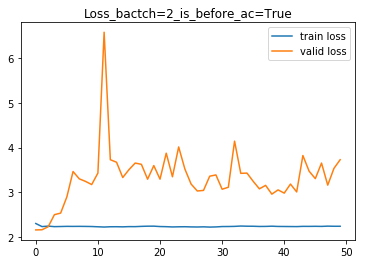

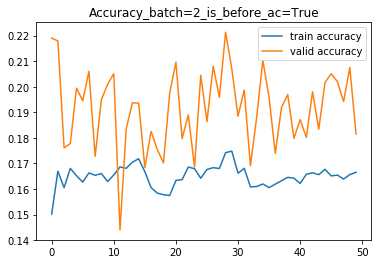

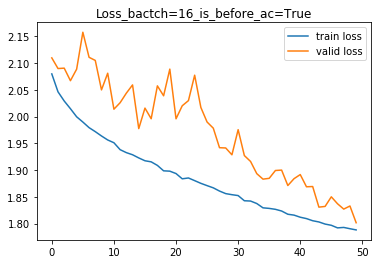

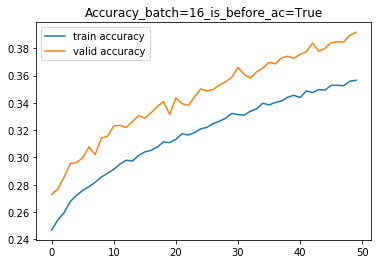

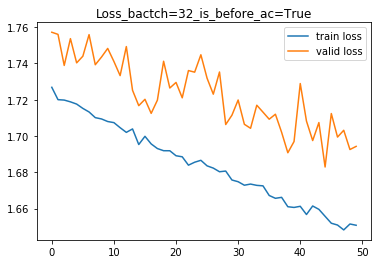

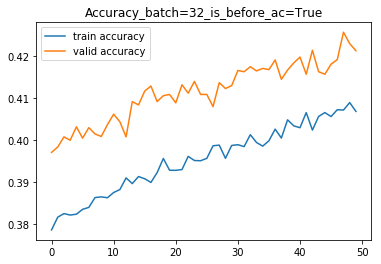

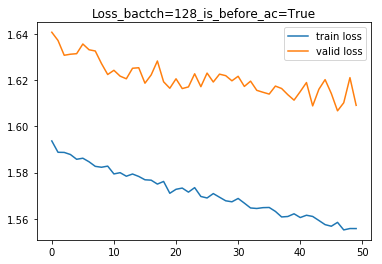

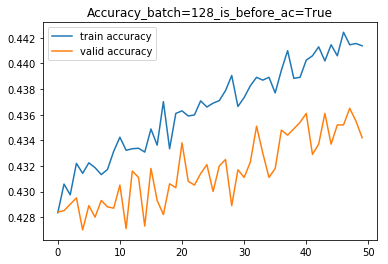

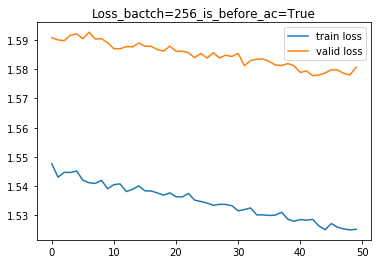

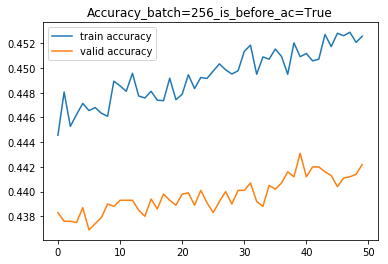

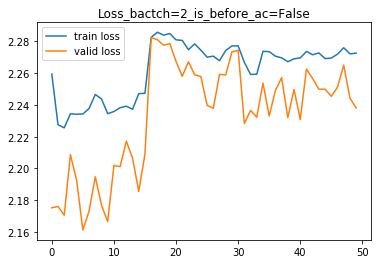

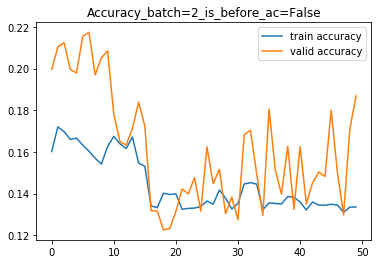

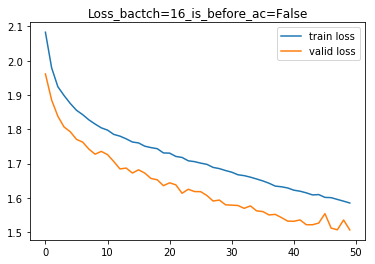

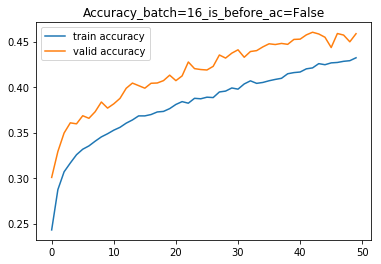

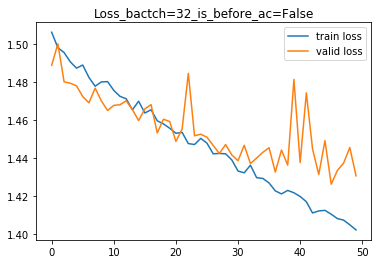

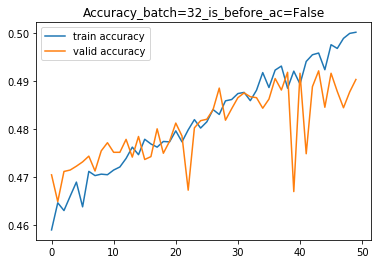

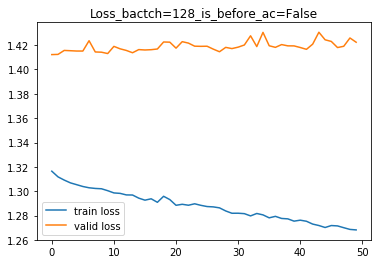

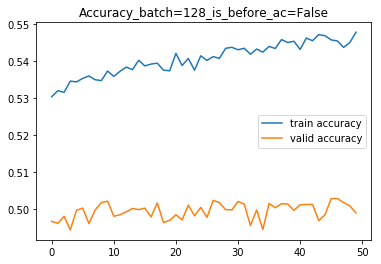

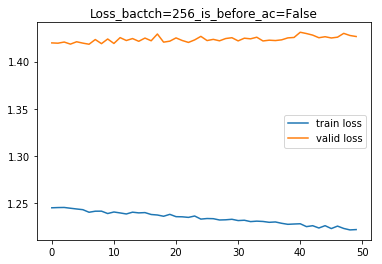

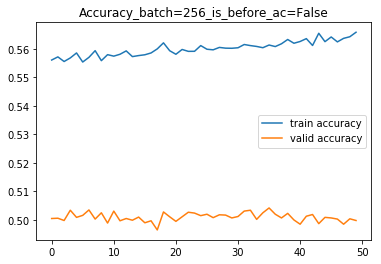

In [28]:
for is_before_ac in IS_BEFORE_AC:
    for batch in BATCH_SIZE:
        key = str(batch) + "_" + "is_norm_after_ac=" + str(is_before_ac)
        result = results[key]
        train_loss = result[0]
        valid_loss = result[1]
        train_acc = result[2]
        valid_acc = result[3]
        
        plt.plot(range(len(train_loss)), train_loss, label="train loss")
        plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
        plt.legend()
        plt.title("Loss"+'_bactch='+key)
        plt.show()

        plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
        plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
        plt.legend()
        plt.title("Accuracy"+'_batch='+key)
        plt.show()